#**DSM-I Assignment I**

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import os
from lets_plot import *
LetsPlot.setup_html()    

In [3]:
df = pd.read_csv("D:/Data Science for Marketing-I/data/bank-additional-full.csv",sep = ';')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [4]:
df['conversion']=df['y'].apply(lambda x:1 if x=='yes' else 0)
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,conversion
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,1
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,0
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,0
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,1


###**Aggregate conversion rate tellsthe overall performance of Marketing Campaigns**

##### 1. Break down the customer base into multiple segments according to Education  ***Hint: Use Pivot table***

In [5]:
conversions_by_education_df =pd.pivot_table(df,index='education',values='y',columns='conversion',aggfunc='count')
conversions_by_education_df

conversion,0,1
education,,
basic.4y,3748,428
basic.6y,2104,188
basic.9y,5572,473
high.school,8484,1031
illiterate,14,4
professional.course,4648,595
university.degree,10498,1670
unknown,1480,251


##### **2. To visualize, use pie-chart for each group**

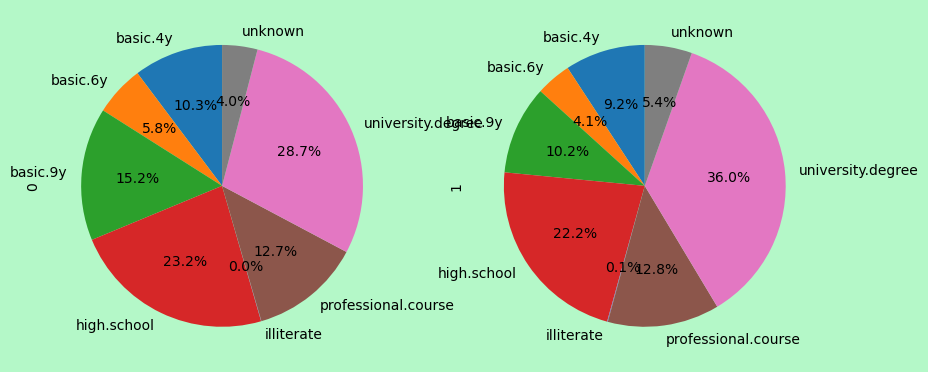

In [21]:
import matplotlib.pyplot as plt
conversions_by_education_df.plot(
    kind='pie',
    figsize=(10, 7),
    subplots=True,
    startangle=90,
    autopct='%1.1f%%',
    legend=None
)

plt.gca().set_facecolor("lightcyan")
plt.gcf().set_facecolor("#b4f8c8")  
plt.show()

#####**3. Break down the customer base into multiple segments according to Job  ** *Hint : Use Pivot table*

In [7]:
conversions_by_job_df =pd.pivot_table(df,index='job',values='y',columns='conversion',aggfunc='count')
conversions_by_job_df

conversion,0,1
job,,
admin.,9070,1352
blue-collar,8616,638
entrepreneur,1332,124
housemaid,954,106
management,2596,328
retired,1286,434
self-employed,1272,149
services,3646,323
student,600,275


In [8]:
conversions_by_job_df.columns =['not conversion','conversion']
conversions_by_job_df

,not conversion,conversion
job,,
admin.,9070,1352
blue-collar,8616,638
entrepreneur,1332,124
housemaid,954,106
management,2596,328
retired,1286,434
self-employed,1272,149
services,3646,323
student,600,275


##### **4. To visualize, use pie-chart for each group**

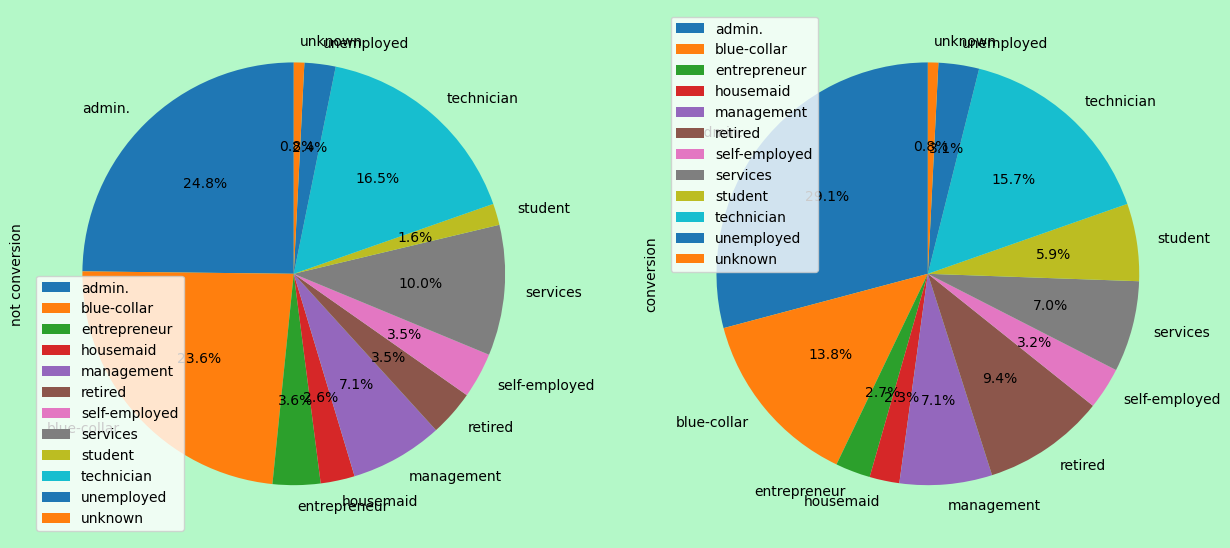

In [9]:
import matplotlib.pyplot as plt

conversions_by_job_df.plot(
    kind='pie',
    figsize=(15, 7),
    subplots=True,
    startangle=90,
    autopct='%1.1f%%'
)

plt.gca().set_facecolor("lightcyan")
plt.gcf().set_facecolor("#b4f8c8")  
plt.show()

**Load Advertising data**

In [10]:
df1 = pd.read_csv("D:/Data Science for Marketing-I/data/Advertising.csv", index_col = 'Date')
df1

,Products,Web,Newspaper,Radio,TV
Date,,,,,
01/01/2018,Mobile,230100,69200,37800,22100
01/02/2018,Mobile,44500,45100,39300,10400
01/03/2018,Mobile,17200,69300,45900,9300
01/04/2018,Mobile,151500,58500,41300,18500
01/05/2018,Mobile,180800,58400,10800,12900
...,...,...,...,...,...
03/06/2019,Laptops,38200,13800,3700,7600
04/06/2019,Laptops,94200,8100,4900,9700
05/06/2019,Laptops,177000,6400,9300,12800


**5. Identify the count of each product**

In [11]:
df1['Products'].unique()

array(['Mobile', 'Electronics', 'Laptops'], dtype=object)

In [12]:
product_counts = df1['Products'].value_counts()
product_counts

Products
Mobile         129
Electronics     53
Laptops         18
Name: count, dtype: int64

##### **6.Display media wise product count**

In [13]:
media=pd.concat([product_counts,df1.groupby('Products')['Web'].sum(),df1.groupby('Products')['Newspaper'].sum(),df1.groupby('Products')['Radio'].sum(),df1.groupby('Products')['TV'].sum()],axis=1)
media

,count,Web,Newspaper,Radio,TV
Products,,,,,
Mobile,129,18962400,4231500,3117600,1848400
Electronics,53,7734400,1500100,1161200,698300
Laptops,18,2711700,379200,374000,257800


In [14]:
web_product_counts = df1.groupby('Products')['Web'].sum()
pd.DataFrame(web_product_counts)


,Web
Products,
Electronics,7734400
Laptops,2711700
Mobile,18962400


In [15]:
Newspaper_product_counts = df1.groupby('Products')['Newspaper'].sum()
pd.DataFrame(Newspaper_product_counts)

,Newspaper
Products,
Electronics,1500100
Laptops,379200
Mobile,4231500


In [16]:
Radio_product_counts = df1.groupby('Products')['Radio'].sum()
pd.DataFrame(Radio_product_counts)

,Radio
Products,
Electronics,1161200
Laptops,374000
Mobile,3117600


In [17]:
TV_product_counts = df1.groupby('Products')['TV'].sum()
pd.DataFrame(TV_product_counts)

,TV
Products,
Electronics,698300
Laptops,257800
Mobile,1848400


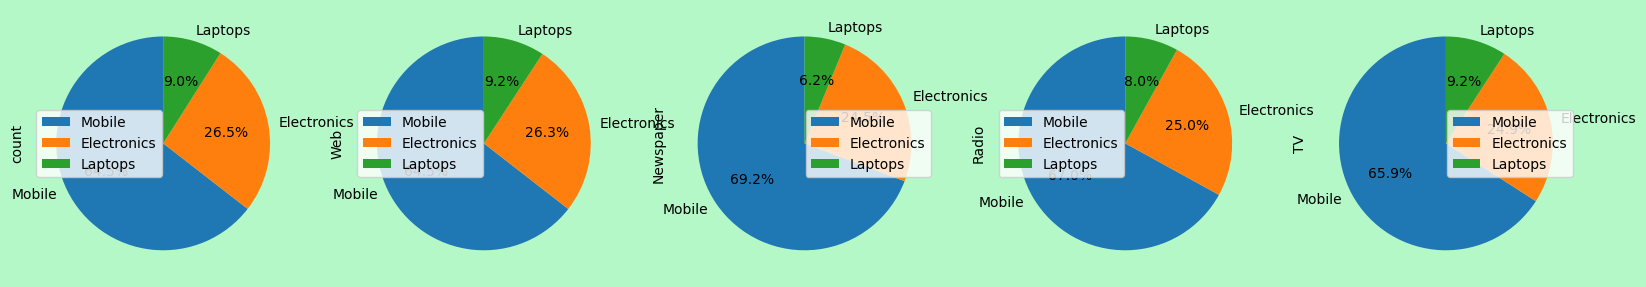

In [18]:
import matplotlib.pyplot as plt

media.plot(
    kind='pie',
    figsize=(20, 7),
    subplots=True,
    startangle=90,
    autopct='%1.1f%%'
)

plt.gca().set_facecolor("lightcyan")
plt.gcf().set_facecolor("#b4f8c8")  
plt.show()